In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.set_option("display.max_colwidth", None)
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv('data/DSphishingTraining.csv')

<h2>Data Exploration</h2>

In [3]:
df.head()

utcms  \
0  1541068721993   
1  1541241522861   
2  1541068721993   
3  1541068721993   
4  1541068721993   

                                                                                                                                 url  \
0                                                                                                     http://improvex.cf/match.1%202   
1                                                                                                    http://bpokenya.org/drive/.boot   
2  http://balticmerchants.com/secure.retail.santander.co.uk.LOGSUK_NS_ENS.BtoChannelDriver.ssobtodse_operationName=LOGON_UPDATE.html   
3                                                                             https://full-length-mirrors.org.uk/file/25GB/index.php   
4                                                                  http://www.full-length-mirrors.org.uk/file/25GB/index2.php?email=   

                         fqdn  is_phishing  
0                 improvex.cf            0  
1                bpokenya.org            0  
2         balticmerchants.com            0  
3  full-length-mirrors.org.uk            0  
4  full-length-mirrors.org.uk            0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101699 entries, 0 to 101698
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   utcms        101699 non-null  int64 
 1   url          101699 non-null  object
 2   fqdn         101699 non-null  object
 3   is_phishing  101699 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [5]:
df['is_phishing'].value_counts()

1    68201
0    33498
Name: is_phishing, dtype: int64

In [6]:
# Drop duplicates
df.drop_duplicates()

utcms  \
0       1541068721993   
1       1541241522861   
2       1541068721993   
3       1541068721993   
4       1541068721993   
...               ...   
101694  1542195560601   
101695  1542195560601   
101696  1542195560601   
101697  1542195560601   
101698  1542195560601   

                                                                                                                                           url  \
0                                                                                                               http://improvex.cf/match.1%202   
1                                                                                                              http://bpokenya.org/drive/.boot   
2            http://balticmerchants.com/secure.retail.santander.co.uk.LOGSUK_NS_ENS.BtoChannelDriver.ssobtodse_operationName=LOGON_UPDATE.html   
3                                                                                       https://full-length-mirrors.org.uk/file/25GB/index.php   
4                                                                            http://www.full-length-mirrors.org.uk/file/25GB/index2.php?email=   
...                                                                                                                                        ...   
101694  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675778353528.kylelierman.com/IlOysTgNjFrGtHtEAwVo   
101695                                                                                      https://xcportsz.000webhostapp.com/secure_help.htm   
101696                                                                                           https://xcportsz.000webhostapp.com/pay_up.htm   
101697                                                                                      https://spvrtcse.000webhostapp.com/secure_help.htm   
101698                                                                                                   http://glamorous.hk/dpopbx/dpbx/dpbx/   

                                                                                                              fqdn  \
0                                                                                                      improvex.cf   
1                                                                                                     bpokenya.org   
2                                                                                              balticmerchants.com   
3                                                                                       full-length-mirrors.org.uk   
4                                                                                       full-length-mirrors.org.uk   
...                                                                                                            ...   
101694  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675778353528.kylelierman.com   
101695                                                                                  xcportsz.000webhostapp.com   
101696                                                                                  xcportsz.000webhostapp.com   
101697                                                                                  spvrtcse.000webhostapp.com   
101698                                                                                                glamorous.hk   

        is_phishing  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
101694            1  
101695            0  
101696            0  
101697            0  
101698            0  

[101648 rows x 4 columns]

In [7]:
df['fqdn'].nunique()

21813

In [8]:
df[df['is_phishing']==1].sample(5)

utcms  \
69572  1541673525521   
63532  1541673525521   
90001  1541932727166   
33720  1541500724376   
77319  1541759926198   

                                                                                                                                                     url  \
69572  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675785210449.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
63532             http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675792432666.kylelierman.com/IlOysTgNjFrGtHtEAwVo   
90001  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675759414439.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
33720  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675776286243.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
77319  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675749781679.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   

                                                                                                             fqdn  \
69572  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675785210449.kylelierman.com   
63532  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675792432666.kylelierman.com   
90001  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675759414439.kylelierman.com   
33720  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675776286243.kylelierman.com   
77319  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675749781679.kylelierman.com   

       is_phishing  
69572            1  
63532            1  
90001            1  
33720            1  
77319            1

<h3>Functions that will be used for feature engineering</h3>
  

In [9]:
datetime.datetime.fromtimestamp(1542019127580/1000)

datetime.datetime(2018, 11, 12, 10, 38, 47, 580000)

In [10]:
def get_month(utcms):
    return datetime.datetime.fromtimestamp(utcms/1000).month

'''
Note: Monday is 0, Sunday is 6
'''
def get_day_of_week(utcms):
    return datetime.datetime.fromtimestamp(utcms/1000).weekday()

def get_hour(utcms):
    return datetime.datetime.fromtimestamp(utcms/1000).hour

In [11]:
def num_digits(url):
    digits = [i for i in url if i.isdigit()]
    return len(digits)

def url_len(url):
    return len(url)

def num_query_params(url):
    params = url.split('&')
    return len(params)

def num_anchors(url):
    anchors = url.split('#')
    return len(anchors) - 1

def contains_http(url):
    if 'http:' in url:
        return 1
    else:
        return 0

def contains_https(url):
    if 'https:' in url:
        return 1
    else:
        return 0

<b>Create new features</b>

In [12]:
df['weekday'] = np.vectorize(get_day_of_week)(df['utcms'])
df['hour_of_day'] = np.vectorize(get_hour)(df['utcms'])
df['num_digits'] = np.vectorize(num_digits)(df['url'])
df['url_len'] = np.vectorize(url_len)(df['url'])
df['num_query_params'] = np.vectorize(num_query_params)(df['url'])
df['num_anchors'] = np.vectorize(num_anchors)(df['url'])
df['http'] = np.vectorize(contains_http)(df['url'])
df['https'] = np.vectorize(contains_https)(df['url'])
df['num_%20'] = df['url'].apply(lambda url:url.count('%20'))
df['num_@'] = df['url'].apply(lambda url:url.count('@'))
df['com_count'] = df['url'].apply(lambda url:url.count('.com'))
df['php_count'] = df['url'].apply(lambda url:url.count('.php'))

df[df['is_phishing']==1].sample(10)

utcms  \
54397  1541587124912   
65783  1541673525521   
37055  1541500724376   
70740  1541759926198   
81739  1541846326699   
21457  1541414323775   
3589   1541155122453   
8940   1541327923319   
52536  1541587124912   
64797  1541673525521   

                                                                                                                                                     url  \
54397  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675757338348.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
65783   http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j575467576061051.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
37055  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675748689421.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
70740  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675712529239.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
81739  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675750638617.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
21457  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675731753341.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
3589   http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675751259307.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
8940              http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675751760689.kylelierman.com/IlOysTgNjFrGtHtEAwVo   
52536  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675784400513.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   
64797  http://cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675759619360.kylelierman.com/IlOysTgNjFrGtHtEAwVo/indexx.php   

                                                                                                             fqdn  \
54397  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675757338348.kylelierman.com   
65783   cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j575467576061051.kylelierman.com   
37055  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675748689421.kylelierman.com   
70740  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675712529239.kylelierman.com   
81739  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675750638617.kylelierman.com   
21457  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675731753341.kylelierman.com   
3589   cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675751259307.kylelierman.com   
8940   cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675751760689.kylelierman.com   
52536  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675784400513.kylelierman.com   
64797  cox.com-6159368de39251d7a-login.id-107sbtd9cbhsbtd5d80a13c0db1f546757jnq9j5754675759619360.kylelierman.com   

       is_phishing  weekday  hour_of_day  num_digits  url_len  \
54397            1        2           10          47      145   
65783            1        3           10          46      144   
37055            1        1           10          47      145   
70740            1        4           10          47      145   
81739            1        5           10          47      145   
21457            1        0           10          47      145   
3589             1        4           10          47      145   
8940             1        6           10          47      134   
52536            1        2           10          47      145   
64797            1        3           10          47      145   

       num_query_params  num_

In [13]:
# Check that all entries are in the same month
df['month'] = np.vectorize(get_month)(df['utcms'])
df['month'].unique()

array([11])

In [14]:
df[df['is_phishing']==0].sample(10)

utcms  \
14505  1541414323775   
90702  1541932727166   
73507  1541759926198   
6790   1541241522861   
93562  1542019127580   
55328  1541587124912   
42400  1541587124912   
77054  1541759926198   
70437  1541759926198   
80925  1541846326699   

                                                                                                                                                                                                                                      url  \
14505       http://juicejs.org/wp-includes/js/bank/americaererle/secure.bankofamerica.comloginsign-insignOnV2Screen.go/challengevdl.php?tm&aof=81efc38b244d7f05d2982a7578367e4b&challengesession=bb3253170fcce4c5d125001de8b1b6056e136b78   
90702                                                                                                                                                                                             http://anfkpk.gov.pk/wp-log/Alogin.html   
73507                                                                                                                                                                 http://oscarbag.id/wp-includes/excel/trademanager/excel/gm/gma2.php   
6790                                                                                                                                                                                                 http://kul.one/media/shippingdoc.htm   
93562                                                                                                                   http://www.innenraume.com/Stripe/verification/40431MCAA53D15M5MDNE/index.php?country_x=US-United+States&lang_x=en   
55328                                                                                                                                                   http://limited-dalmaceboncoeur.com/www.bankofamerica.com/check/4b85caff/login.php   
42400                                                                                                                         http://portail-agrc-plib.com/Dossier_Plib.ssl2104983468234/7fdb75979a695929e2dbafbce9bf2aa6/information.php   
77054  http://datarescue.cl/bace/cbaa711f0b56548135497e750d52ba6e/?.verify?service=mail&base64,PGh0bWw%20DQo8c3R5bGU%20IGJvZHkgeyBtYXJnaW46IDA7IG92ZXJmbG93OiBoaWRkZW47IH0gPC9zdHlsZT4NCiAgPGlmcmFt=&charset=utf-8&data:text/html=&login=   
70437                                                                                                                                                      http://www.innenraume.com/Stripe/verification/CENN9E78C0CANB1EE5D7/acc_ver.php   
80925                                                                                                                                                   http://advar.ca/cqi-bin/DHL/Tracking.php?l=_JeHFUq_VJOXK0QWHtoGYDw_Product-UserID   

                              fqdn  is_phishing  weekday  hour_of_day  \
14505                  juicejs.org            0        0           10   
90702                anfkpk.gov.pk            0        6           10   
73507                  oscarbag.id            0        4           10   
6790                       kul.one            0        5           10   
93562               innenraume.com            0        0           10   
55328  limited-dalmaceboncoeur.com            0        2           10   
42400        portail-agrc-plib.com            0        2           10   
77054                datarescue.cl            0        4           10   
70437               innenraume.com            0        4           10   
80925                     advar.ca            0        5           10   

       num_digits  url_len  num_query_params  num_anchors  http  https  \
14505          49      221                 3            0     1      0   
90702           0       39                 1            0     1      0   
73507           1       67                 1            0     1      0   
6790            0       36                

In [15]:
df.describe()

utcms    is_phishing        weekday    hour_of_day  \
count  1.016990e+05  101699.000000  101699.000000  101699.000000   
mean   1.541612e+12       0.670616       2.526878      10.077572   
std    2.530848e+08       0.469992       1.944275       0.267498   
min    1.541069e+12       0.000000       0.000000      10.000000   
25%    1.541414e+12       0.000000       1.000000      10.000000   
50%    1.541587e+12       1.000000       2.000000      10.000000   
75%    1.541760e+12       1.000000       4.000000      10.000000   
max    1.542196e+12       1.000000       6.000000      11.000000   

          num_digits        url_len  num_query_params    num_anchors  \
count  101699.000000  101699.000000     101699.000000  101699.000000   
mean       37.520143     128.870038          1.180493       0.001327   
std        23.496695      48.358277          0.791214       0.044216   
min         0.000000      17.000000          1.000000       0.000000   
25%        26.000000     114.000000          1.000000       0.000000   
50%        47.000000     145.000000          1.000000       0.000000   
75%        47.000000     145.000000          1.000000       0.000000   
max       753.000000    1187.000000         18.000000       2.000000   

                http          https        num_%20          num_@  \
count  101699.000000  101699.000000  101699.000000  101699.000000   
mean        0.934670       0.066628       0.038162       0.013432   
std         0.247109       0.249378       0.330030       0.263696   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000      17.000000      13.000000   

           com_count      php_count     month  
count  101699.000000  101699.000000  101699.0  
mean        1.572631       0.720597      11.0  
std         0.687286       0.450130       0.0  
min         0.000000       0.000000      11.0  
25%         1.000000       0.000000      11.0  
50%         2.000000       1.000000      11.0  
75%         2.000000       1.000000      11.0  
max         5.000000       4.000000      11.0

1    68096
0      105
Name: http, dtype: int64

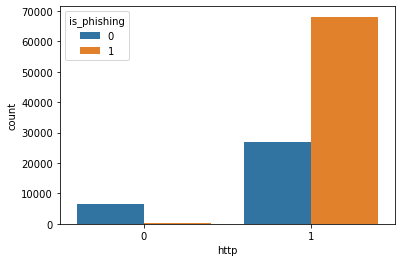

In [16]:
phishing_df = df[df['is_phishing']==1]
safe_df = df[df['is_phishing']==0]

sns.countplot(data=df, x='http', hue='is_phishing')
phishing_df['http'].value_counts()

2    67663
1      429
0       96
3       13
Name: com_count, dtype: int64

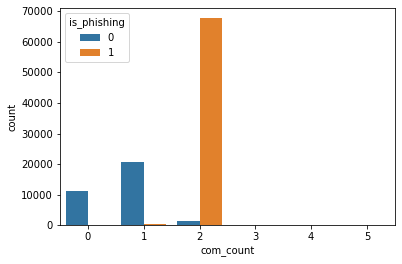

In [17]:
sns.countplot(data=df, x='com_count',hue='is_phishing')
phishing_df['com_count'].value_counts()

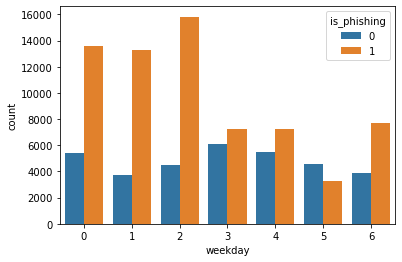

In [18]:
sns.countplot(data=df, x='weekday',hue='is_phishing');

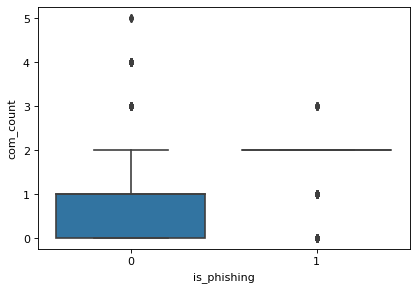

In [19]:
plt.figure(dpi=80)
sns.boxplot(x='is_phishing', y='com_count', data=df);

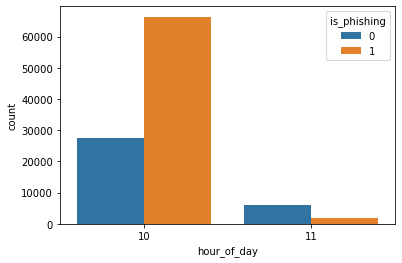

In [20]:
sns.countplot(data=df, x='hour_of_day',hue='is_phishing');

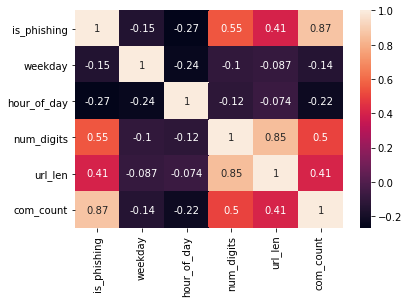

In [21]:
new_df = df[['is_phishing','weekday','hour_of_day','num_digits','url_len','com_count']]
sns.heatmap(new_df.corr(), annot=True);

<b> Correlations may not be very accurate for non-continuous data </b>

<h2>Make new dataframe using features wanted for model</h2>

In [22]:
# new_df = df[['com_count','weekday','is_phishing']]
new_df = df[['com_count','hour_of_day','weekday','num_digits','url_len','is_phishing']]
new_df

com_count  hour_of_day  weekday  num_digits  url_len  is_phishing
0               0           10        3           4       30            0
1               0           10        5           0       31            0
2               1           10        3           0      129            0
3               0           10        3           2       54            0
4               0           10        3           3       65            0
...           ...          ...      ...         ...      ...          ...
101694          2           11        2          47      134            1
101695          1           11        2           3       50            0
101696          1           11        2           3       45            0
101697          1           11        2           3       50            0
101698          0           11        2           0       37            0

[101699 rows x 6 columns]

In [23]:
# Change type of feature weekday from int to string as it is nominal data
new_df['weekday'] = new_df['weekday'].apply(str)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101699 entries, 0 to 101698
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   com_count    101699 non-null  int64 
 1   hour_of_day  101699 non-null  int32 
 2   weekday      101699 non-null  object
 3   num_digits   101699 non-null  int32 
 4   url_len      101699 non-null  int32 
 5   is_phishing  101699 non-null  int64 
dtypes: int32(3), int64(2), object(1)
memory usage: 3.5+ MB


In [24]:
# Create dummy variables for the weekdays
df_nom = new_df.select_dtypes(include=object)
df_num = new_df.select_dtypes(exclude=object)

df_nom_dummies = pd.get_dummies(df_nom, drop_first=True)
new_df = pd.concat([df_num, df_nom_dummies], axis=1)
new_df.head()

com_count  hour_of_day  num_digits  url_len  is_phishing  weekday_1  \
0          0           10           4       30            0          0   
1          0           10           0       31            0          0   
2          1           10           0      129            0          0   
3          0           10           2       54            0          0   
4          0           10           3       65            0          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0          0          1          0          0          0  
1          0          0          0          1          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0

<h2>Pre-process the data and train model</h2>

In [25]:
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, fbeta_score, roc_curve, auc

In [26]:
X = new_df.drop('is_phishing', axis=1)
y = new_df['is_phishing']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b>Logistic Regression</b> is the choice of algorithm as the classification is one of binary nature. In addition by using a simple linear decision boundary we can avoid overfitting to the training data which will allow more generalization of the model.

<b>SAG</b> is the solver of choice as it typically converges faster than stochastic gradient descent by remembering previous gradient values

<b>Gridsearch</b> is performed testing varying values of C to test different strengths of regularization and we use <b>recall</b> as the scoring parameter as the model should aim to minimize false negatives since falsely classifying a phishing url as safe would be worse than classifying a safe url as phishing

In [28]:
# Initialise the scaler and model
scaler = StandardScaler()
log_model = LogisticRegression(solver='sag')

# Check the param names
#print(log_model.get_params().keys())

# Set up the operations for the pipeline
operations = [('scaler', scaler), ('log_model', log_model)]

# Put the operations in the pipeline
pipe = Pipeline(operations)

# Set up the grid search to find the best C
param_grid = {'log_model__C': np.logspace(0, 10, 20)}

# Initialise the grid search cross validation
grid_cv_model = GridSearchCV(pipe,
                            param_grid,
                            cv=10,
                            scoring='recall',
                            n_jobs=16
                            )

In [29]:
# Train the model on train set

# Used for plotting ROC curve later
y_score = grid_cv_model.fit(X_train, y_train).decision_function(X_test)

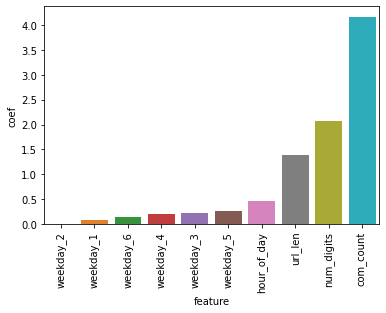

In [30]:
# Feature importance
beta_coef = grid_cv_model.best_estimator_.named_steps['log_model'].coef_
df_coefs = pd.DataFrame({'feature': X.columns.tolist(),
                          'coef': abs(beta_coef[0])
                         })
sns.barplot(data=df_coefs.sort_values(by='coef'), x='feature', y='coef')
plt.xticks(rotation=90)
plt.show()

In [31]:
pd.DataFrame(grid_cv_model.cv_results_)
# grid_cv_model.best_estimator_.step

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.685931      0.052930         0.008408        0.003415   
1        0.655897      0.050357         0.007607        0.001020   
2        0.713453      0.044952         0.006906        0.000831   
3        0.690434      0.018751         0.006806        0.000873   
4        0.681723      0.054256         0.007006        0.000633   
5        0.706543      0.039658         0.007206        0.001663   
6        0.722057      0.070054         0.006806        0.001078   
7        0.806284      0.087055         0.007006        0.001001   
8        0.768203      0.050032         0.006857        0.001099   
9        0.809477      0.119281         0.006824        0.000732   
10       0.765254      0.062835         0.006808        0.000752   
11       0.771974      0.055717         0.006506        0.000501   
12       0.742376      0.045327         0.007464        0.002288   
13       0.700589      0.058986         0.006906        0.001760   
14       0.707649      0.017664         0.006806        0.000749   
15       0.721407      0.041789         0.006306        0.000782   
16       0.699137      0.040776         0.006506        0.000807   
17       0.709746      0.045744         0.006606        0.000664   
18       0.666564      0.044729         0.006006        0.000775   
19       0.470794      0.089846         0.004304        0.000641   

   param_log_model__C                                params  \
0                 1.0                 {'log_model__C': 1.0}   
1            3.359818  {'log_model__C': 3.3598182862837818}   
2           11.288379   {'log_model__C': 11.28837891684689}   
3           37.926902  {'log_model__C': 37.926901907322495}   
4          127.427499  {'log_model__C': 127.42749857031335}   
5           428.13324   {'log_model__C': 428.1332398719391}   
6         1438.449888   {'log_model__C': 1438.449888287663}   
7         4832.930239   {'log_model__C': 4832.930238571752}   
8        16237.767392   {'log_model__C': 16237.76739188721}   
9        54555.947812  {'log_model__C': 54555.947811685146}   
10      183298.071083  {'log_model__C': 183298.07108324338}   
11      615848.211066   {'log_model__C': 615848.2110660254}   
12     2069138.081115  {'log_model__C': 2069138.0811147902}   
13     6951927.961776   {'log_model__C': 6951927.961775606}   
14    23357214.690901  {'log_model__C': 23357214.690901212}   
15    78475997.035146   {'log_model__C': 78475997.03514607}   
16   263665089.873036  {'log_model__C': 263665089.87303555}   
17   885866790.410083   {'log_model__C': 885866790.4100832}   
18  2976351441.631313  {'log_model__C': 2976351441.6313133}   
19      10000000000.0       {'log_model__C': 10000000000.0}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.992117           0.992667           0.993584   
1            0.992117           0.992667           0.993584   
2            0.992117           0.992667           0.993584   
3            0.992117           0.992667           0.993584   
4            0.992117           0.992667           0.993584   
5            0.992117           0.992667           0.993584   
6            0.992117           0.992667           0.993584   
7            0.992117           0.992667           0.993584   
8            0.992117           0.992667           0.993584   
9            0.992117           0.992667           0.993584   
10           0.992117           0.992667           0.993584   
11           0.992117           0.992667           0.993584   
12           0.992117           0.992667           0.993584   
13           0.992117           0.992667           0.993584   
14           0.992117           0.992667           0.993584   
15           0.992117           0.992667           0.993584   
16           0.992117           0.992667           0.993584   
17           0.992117           0.992667           0.993584   
18           0.992117           0.992667           0.9

In [32]:
y_pred = grid_cv_model.predict(X_test)

<h2>Model Evaluation</h2>

In [33]:
accuracy_score(y_test, y_pred)

0.977630285152409

In [34]:
plot_confusion_matrix(grid_cv_model,X_test,y_test);

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6683
           1       0.98      0.99      0.98     13657

    accuracy                           0.98     20340
   macro avg       0.98      0.97      0.97     20340
weighted avg       0.98      0.98      0.98     20340



<b>As the model is one that will detect phishing urls, F2 score is used as recall holds more weight since we want to avoid the amount of false negatives

In [36]:
print(f'F2-Measure: {fbeta_score(y_test, y_pred, beta=2)}')

F2-Measure: 0.9879697491751104


In [37]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [38]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristic")
plt.legend(loc="lower right")
plt.show()

<h1>Final Steps</h1>

In [39]:
# Retrain model on entire dataset
grid_cv_model.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model',
                                        LogisticRegression(solver='sag'))]),
             n_jobs=16,
             param_grid={'log_model__C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10])},
             scoring='recall')

In [40]:
# Save model
# dump(grid_cv_model, open('model.pkl', 'wb'))

In [41]:
# Save train and validation data
# train_data = pd.concat([X_train, y_train], axis=1)
# test_data = pd.concat([X_test, y_test], axis=1)
# train_data.to_csv('data/train.csv', index=False)
# test_data.to_csv('data/val.csv', index=False)